In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styles
sns.set(style="whitegrid")


In [2]:
# Load the cleaned dataset
file_path = "cleaned_data.csv"
data = pd.read_csv(file_path)

# Preview data
data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


C:\Users\Vaish\AppData\Local\Temp\ipykernel_12448\3680911242.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_revenue.values, y=country_revenue.index, palette="viridis")


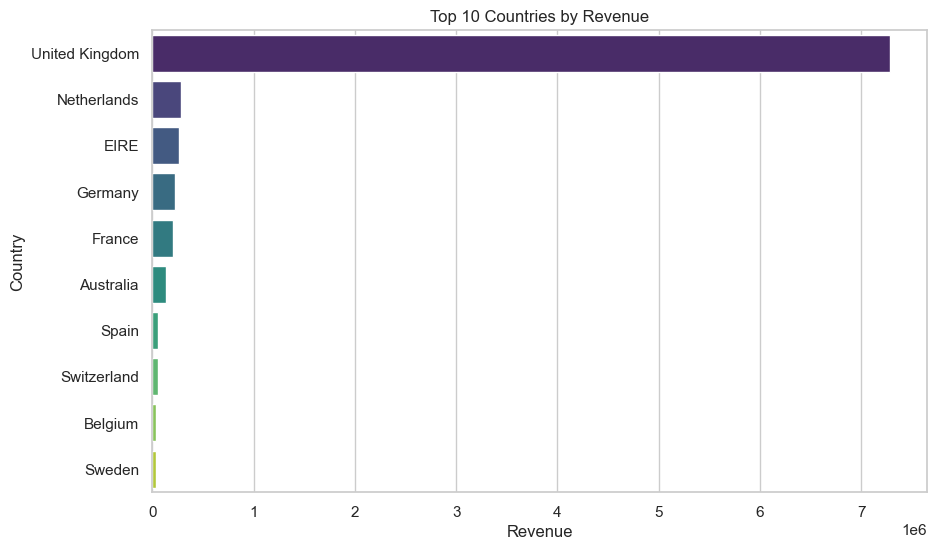

In [3]:
# Group by country and sum TotalPrice
country_revenue = data.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=country_revenue.values, y=country_revenue.index, palette="viridis")
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Country")
plt.show()


C:\Users\Vaish\AppData\Local\Temp\ipykernel_12448\794851773.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.values, y=product_sales.index, palette="magma")


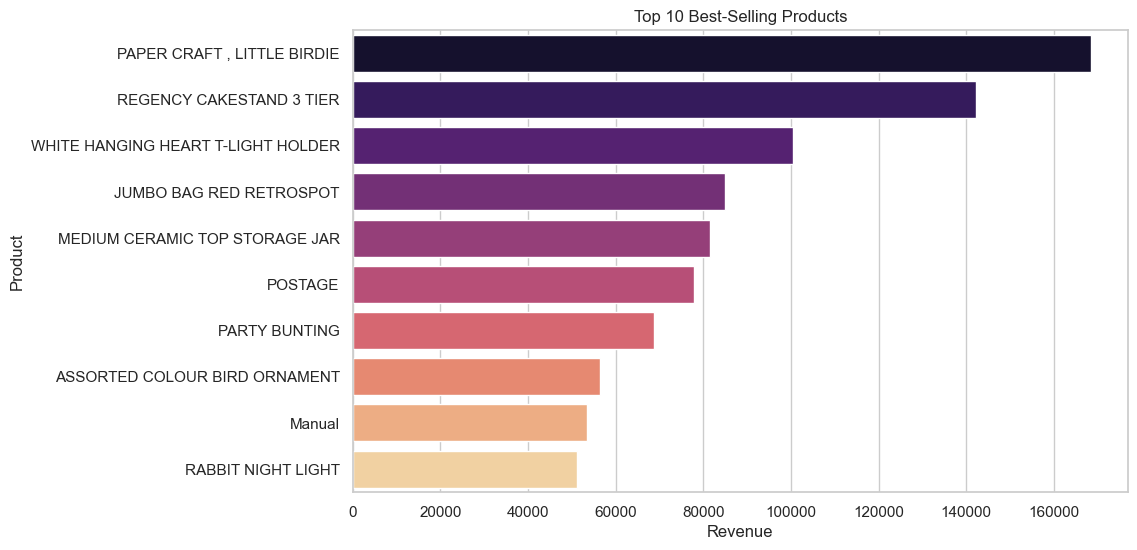

In [4]:
# Group by Description and sum TotalPrice
product_sales = data.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=product_sales.values, y=product_sales.index, palette="magma")
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Revenue")
plt.ylabel("Product")
plt.show()


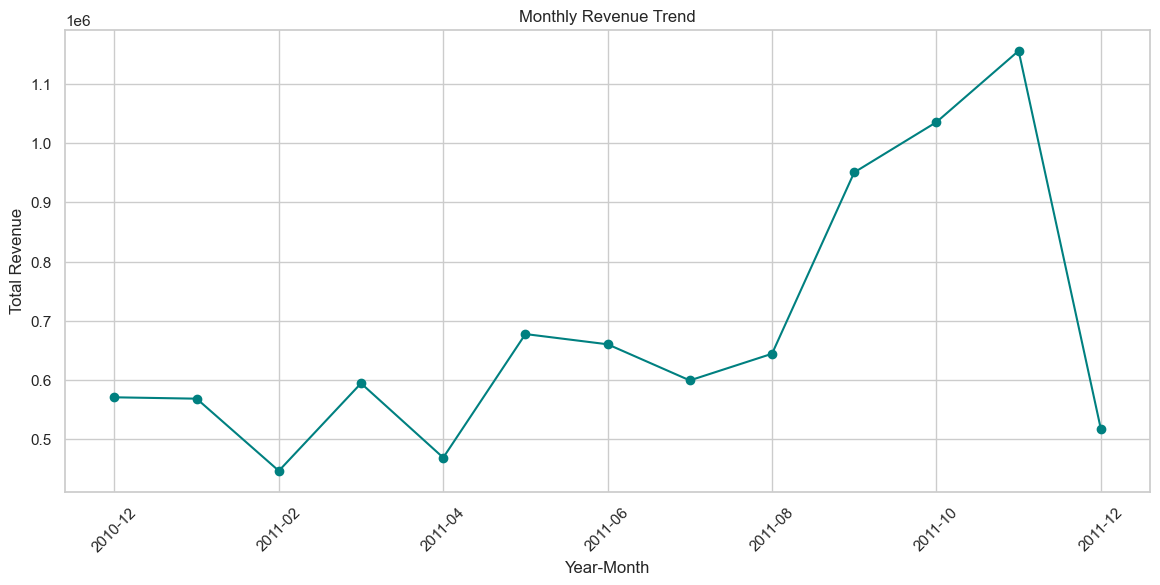

In [5]:
# Create Year-Month column
data['YearMonth'] = data['InvoiceDate'].apply(lambda x: x[:7])

# Group by YearMonth
monthly_revenue = data.groupby('YearMonth')['TotalPrice'].sum()

# Plot
plt.figure(figsize=(14,6))
monthly_revenue.plot(kind='line', marker='o', color='teal')
plt.title("Monthly Revenue Trend")
plt.xlabel("Year-Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()


C:\Users\Vaish\AppData\Local\Temp\ipykernel_12448\434457728.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=data, palette="cubehelix")


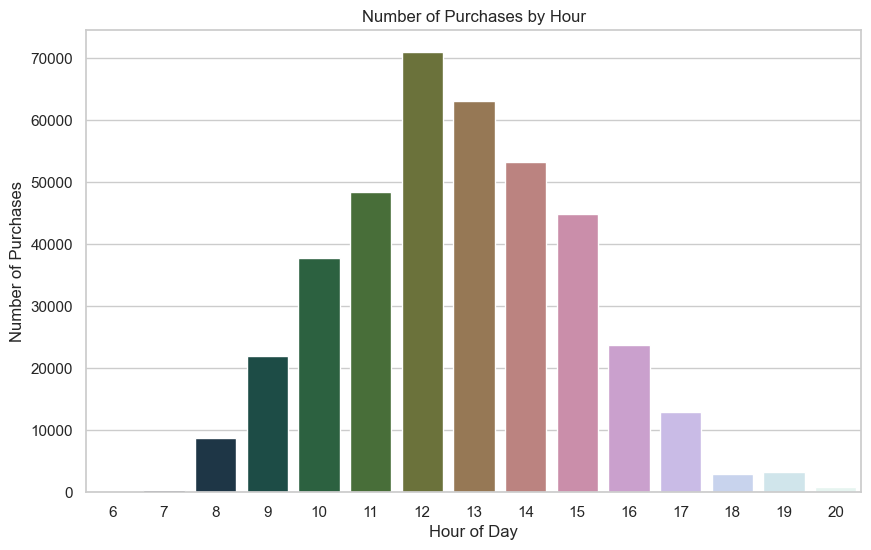

In [6]:
# Extract hour from InvoiceDate
data['Hour'] = pd.to_datetime(data['InvoiceDate']).dt.hour

# Plot
plt.figure(figsize=(10,6))
sns.countplot(x='Hour', data=data, palette="cubehelix")
plt.title("Number of Purchases by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Purchases")
plt.show()


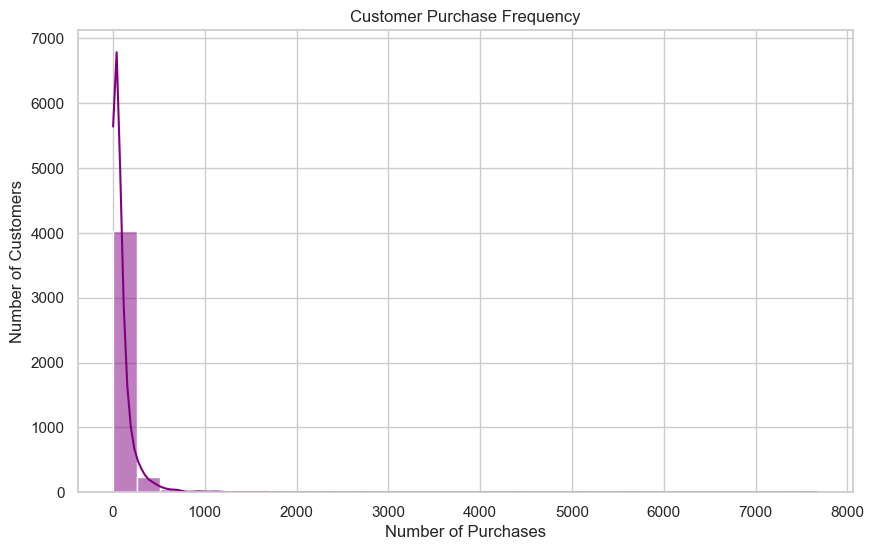

In [7]:
# Count number of purchases per customer
customer_freq = data['CustomerID'].value_counts()

# Plot
plt.figure(figsize=(10,6))
sns.histplot(customer_freq, bins=30, kde=True, color="purple")
plt.title("Customer Purchase Frequency")
plt.xlabel("Number of Purchases")
plt.ylabel("Number of Customers")
plt.show()
